In [118]:
import yfinance as yf
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [119]:
fn_name = "EUPWR.IS"
THY = yf.Ticker(fn_name)

print(THY.info)
print(THY.info['dayHigh'])
print(THY.info['previousClose'])

now_close = THY.info['dayHigh']
Yesterday_close = THY.info['previousClose']
#! -> dict formatında objelerde bu şekilde çağırma yapılabiliyor. /-/ Buna dikkat etmek lazım çünkü bunu nerdeyse hedefe belirlediğimiz genel tüm kağıtlar için uygulanacak.



{'address1': 'Saray Mah. Atom Cad. No:17', 'address2': 'Kahramankazan', 'city': 'Ankara', 'country': 'Turkey', 'phone': '90 312 815 48 80', 'fax': '90 312 815 48 81', 'website': 'https://www.europowerenerji.com.tr', 'industry': 'Electrical Equipment & Parts', 'industryKey': 'electrical-equipment-parts', 'industryDisp': 'Electrical Equipment & Parts', 'sector': 'Industrials', 'sectorKey': 'industrials', 'sectorDisp': 'Industrials', 'longBusinessSummary': 'Europower Enerji Ve Otomasyon Teknolojileri Sanayi Ticaret Anonim Sirketi develops, manufactures, and sells products for low, medium, and high voltage electrical systems. The company offers medium and low voltage products, Compact substations, PFC systems, railway products, and silicone insulators, as well as oil type distribution, medium power, and special type transformers. It also undertakes electrical and electromechanical EPC projects in Turkey and internationally. The company is based in Ankara, Turkey.', 'fullTimeEmployees': 144

# hazırladığımız EMA protokolünü kullanalım bakalım aradığımız gibi bir classfication çalışacak mı?
#   -> bizim uyguladığımız ayrı ema protokolünü son 2000 gün verisi iin uygulayıp sonrasında son 200 gün için özelleştirip sıcak sıcak buraya koymamız lazım. Sonrasında şu anki güncel değer ile ema hesaplması ve yüzdelik farkını hesaplayıp, diğer tarafta eğitilen güncel modeli sisteme girmemiz gerekli.
    bunu json dosyaları üzerinden yapılabilirliğini umuyorum. Göreceğiz.
    öncelikle Klasik EMA yapısını buraya entegre edebilir miyiz? bunu düşüneceğiz.


## -> bunu main sayfadan alınan değerleri bir json dosyası içine gönderip 


In [120]:

data_thy = THY.history(period="6y")
print(data_thy)
print(type(data_thy),"\n\n\n",data_thy.iloc[:,3:4].values,len(data_thy.iloc[:,3:4].values))
df_thy = data_thy.iloc[:,3:4].values

# 1523 tane kapanış değeri  toplandı şu an thy için diğer kodda uyguladığımız adımları aynı şekilde ekleyelim bakalım.




                                 Open        High         Low       Close  \
Date                                                                        
2023-04-20 00:00:00+03:00   44.660000   44.660000   44.660000   44.660000   
2023-04-24 00:00:00+03:00   49.119999   49.119999   49.119999   49.119999   
2023-04-25 00:00:00+03:00   54.000000   54.000000   54.000000   54.000000   
2023-04-26 00:00:00+03:00   59.400002   59.400002   59.400002   59.400002   
2023-04-27 00:00:00+03:00   65.300003   65.300003   65.300003   65.300003   
...                               ...         ...         ...         ...   
2024-02-09 00:00:00+03:00  195.899994  201.000000  193.000000  193.699997   
2024-02-12 00:00:00+03:00  197.600006  199.000000  192.500000  193.899994   
2024-02-13 00:00:00+03:00  194.600006  195.100006  182.899994  183.699997   
2024-02-14 00:00:00+03:00  183.699997  184.000000  178.399994  183.399994   
2024-02-15 00:00:00+03:00  184.600006  187.300003  184.300003  185.000000   

![EMA200](https://s3.amazonaws.com/cdn.freshdesk.com/data/helpdesk/attachments/production/43410796706/original/oX7DT85QnWZL0_59eG4dxufx7IIVYlyerw.png)


In [121]:
def exponential_moving_average(prices, period, weighting_factor=0.2):
    ema = np.zeros(len(prices))
# belirli bir aralık belirtmeden elimizdeki tüm fiyatları aldık, sonrasında periodu ayrı şekilde EMA da kaç tane gelmesini istiyorsak ona göre çektik.
    try:
        sma = np.mean(prices[:period]) 
        ema[period - 1] = sma 
        print("we in the try section")
    except Exception as e:
        sma = np.mean(prices[:len(prices)])
        period = 1
        ema[period - 1] = sma
        print("we in the except section")
# SMA değeri periotta (en yeniden en eskiye göre kaç tane kapanış fiyatı üzerinden yapılacağını ifade etti. periot kadar değişken üzeridne ilk ortalama hesaplandı )

     

    counter = 1
    for i in range(period, len(prices)):
        ema[i] = (prices[i] * weighting_factor) + (ema[i - 1] * (1 - weighting_factor))
        counter +=1
    return ema,counter

prices = df_thy

#?========================
period = 200
#?========================

"""
ağırlık değeri genel olarak EMA değerinin aktif hesaplanmasında etkili bir değerdir.
    0 ile 1 arasında değer almaktadır ve bu EMA değeri ile aradaki farkı etkileyecektir.
    şuan kendi sistemimde 0.7 olarak ayarlandı 

 """

#=======================
weighting_factor = 0.0069
#=======================


# ema değeri direkt olarak rpice değerindeki geçmiş değerlerin tümüyle ilşkili olarak gelmektedir. periotta atanna değerden zamana göre geriye doğru gelecketir.
# bunun 200 değeri son 200 değerden anlaşılıyor. 

##EMA_200 = ema[:200]
ema, cte= exponential_moving_average(prices, period, weighting_factor)
state_time = int(input("Enter your last interaction day :: "))
EMA_200 = ema[-state_time:]


we in the try section


In [122]:
prices_200= prices[-state_time:]

df_p = pd.DataFrame(data=prices_200)
df_ema= pd.DataFrame(data=EMA_200)
print(df_ema)
df_with_EMA = pd.concat([df_p,df_ema],keys=["Prices","EMA-200"],axis=1)

print(df_with_EMA.tail(5)) # head(0)-> dataframe olarak bu datayı yorumladığımızda başlık 0. indexte tutulup bunu birinci olarak alıyor ve işliyor.

percent_arr=[]
if len((df_with_EMA.iloc[:,:1].values))<state_time:
    # yeni state time bu az olan değerin kendisi kadar eşitlenebilir zaten öbür türlü problem çıkmaz.
    state_time = len((df_with_EMA.iloc[:,:1].values))
    print("we dont find the any interaction before the state time :::: \n\n!!! So, we limited max lower iteraction time")
for i in range(state_time):
    percent = (((df_with_EMA.iloc[:,:1].values)[i]-(df_with_EMA.iloc[:,1:].values)[i])/(df_with_EMA.iloc[:,:1].values)[i])*100
    percent_arr.append(percent)

#========================================================= -> perdcent arr hazır durumdadır.

# percent_arr.reverse() ||| uygulanması gerekli diyordum reverse yapınca grafik percentage değerler arasında fark var düzgün değil.


percent_arr = np.array(percent_arr)
print(percent_arr)

              0
0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
..          ...
196    0.000000
197    0.000000
198    0.000000
199  159.075150
200  159.254032

[201 rows x 1 columns]
         Prices     EMA-200
              0           0
196  193.699997    0.000000
197  193.899994    0.000000
198  183.699997    0.000000
199  183.399994  159.075150
200  185.000000  159.254032
we dont find the any interaction before the state time :::: 

!!! So, we limited max lower iteraction time
[[100.        ]
 [100.        ]
 [100.        ]
 [100.        ]
 [100.        ]
 [100.        ]
 [100.        ]
 [100.        ]
 [100.        ]
 [100.        ]
 [100.        ]
 [100.        ]
 [100.        ]
 [100.        ]
 [100.        ]
 [100.        ]
 [100.        ]
 [100.        ]
 [100.        ]
 [100.        ]
 [100.        ]
 [100.        ]
 [100.        ]
 [100.        ]
 [100.        ]
 [100.        ]
 [100.        ]
 [100.        ]
 [100.        ]
 [100.        ]
 

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201]


<Figure size 4000x4000 with 0 Axes>

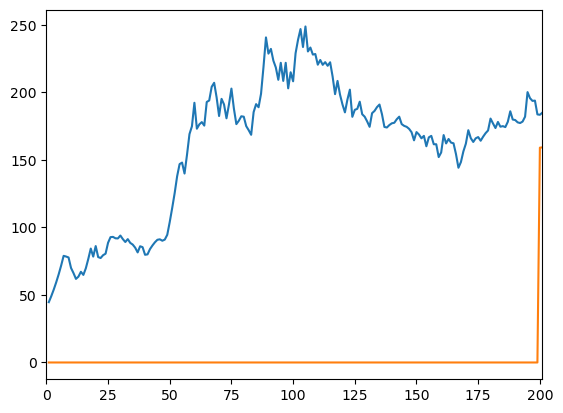

<Figure size 4000x4000 with 0 Axes>

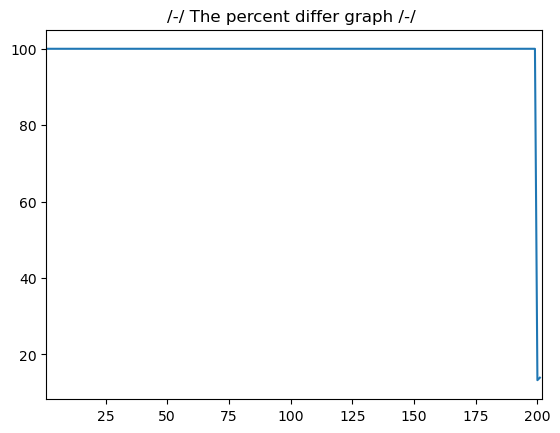




Max percentage::  100.0 
Min percentage:: 13.2633


In [123]:
# mathplotlib ile bunu direkt çizdirelim. değerler olarak üst üste price & EMA değerlerini 200 günlük olarak da bunu kısıtlamıştık x değerini 0 ile 200 olarak alacağız


plt.figure(figsize=(20,20),dpi=200)
xp = np.linspace(0, 80,100)
x_axes = np.array(range(1,state_time+1))
print(x_axes)
plt.figure()
plt.plot(x_axes,(df_with_EMA.iloc[:,:1].values))
plt.plot(x_axes,(df_with_EMA.iloc[:,1:].values))


# lütfen x değerlerine dikkat edelim, y değerlerinin miktarı ile x değerlerine karşılık gelen değerlerinin sayısı birbiirne eşit olması gereklidir.
plt.xlim(0, state_time)
plt.show()


#=====================Percentage  graph ===================

plt.figure(figsize=(20,20),dpi=200)
xp = np.linspace(0, 80,100)
x_axes = np.array(range(1,state_time+1))
plt.figure() # -->figure işlemleri yapılırken bu kodun altında title kalmalıdır. /-/ eğer figure uygulanmak istenmiyor ise bu figure() kaldırılabilir.
plt.title("/-/ The percent differ graph /-/ ")
plt.plot(x_axes,percent_arr)
plt.ylim((percent_arr.min()-5),(percent_arr.max()+5))
plt.xlim(1,state_time+1)
plt.show()
percent_arr = np.round(percent_arr,decimals=4) # virgülden sonra 4 basamak gösterecektir.

print("\n\n\n=======================","\nMax percentage:: ",percent_arr.max(),"\nMin percentage::",percent_arr.min())

In [124]:


min_arr = percent_arr.min()
max_arr = percent_arr.max()

inc = float((max_arr-min_arr)/5)

length_arr = state_time+1
counter = 1
classes = np.zeros(state_time)
i = 0
for value in percent_arr:
    
    value_f = float(value)
    
    if(value_f>(min_arr) and value_f<(min_arr+inc)):
        classes[i] = 1
    
    elif(value_f>=(min_arr+inc) and value_f<(min_arr+2*inc)):
        classes[i] = 2
    
    elif(value_f>=(min_arr+2*inc) and value_f<(min_arr+3*inc)):
        classes[i] = 3
    
    elif(value_f>=(min_arr+3*inc) and value_f<(min_arr+4*inc)):
        classes[i] = 4
    
    elif(value_f>=(min_arr+4*inc) and value_f<(max_arr)):
        classes[i] = 5
    
    elif(value_f>=(max_arr)):
        classes[i] = 5 # -> ML öğrenmesinde sadece bir örnek olma ihtimali var o yüzden class 7 - en yüksek oran içine çekildi.
        # /-/ en yüksek oranda ama rekoru kırabilcek değer gelirse bu öğrenimde sınır değerlere ilişkin bir parametre eklenebilir.
        
        # overrated /-/ son 200 günün EMA-Price değeri arasındaki enn yüksek fark görülme durumu, satım tavsiyesi max durumdadır.
        
        
    elif(value_f<=(min_arr)):
        classes[i] = 1  #-> ML öğrenmesinde sadece bir örnek olma ihtimali var o yüzden class 6 - en düşük oran içine çekildi.
        #downrated /-/ son 200 günün EMA-price değeri arasındaki min değerdir. -> alım yapılması en yüksek tavsiye grubundadır
        
    else:
        pass
    counter +=1
    i +=1
classes = classes.astype(int)


In [125]:
# // Time of Randomforest
#! -> Random forest entegration 

"""
    -> random forest uygulması sonrasında yeniden ele alınacaktır, dataset gönderilecek ve model ayrı bir dosya içinde eğitilecektir.
        - ileride farklı parametreler eklendiğinde daha temiz ve dinamik bir sistem ile çalışmak daha sağlıklı olacaktır.
        
"""
X = percent_arr
print(X)
Y = classes
print(Y)

# ////////////// train - test :: bağımlı(y) - bağımsız(x) değişknelerin ayarlanması \\\\\\\\\\\\\\\\\


from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.33, random_state = 0)



# ////////////// standartscaler ile veirelrin aynı ölçeğe çekilmesi  \\\\\\\\\\\\\\\\\

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()   



X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)


#///////////// random forest classifier \\\\\\\\\\\\\\\\\

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=5 , criterion="gini")
rfc.fit(x_train, y_train)

y_pred = rfc.predict(x_test)

# -> önceki örneklerde yeterince kullandığımız bir syntax yeter gari yorum vermeyeceğim artık.

    


#//////////////// confusion matrixes \\\\\\\\\
    
from sklearn.metrics import confusion_matrix

con_matrix = confusion_matrix(y_test, y_pred)

print("*********Random Forest Classifier***********")
print(con_matrix)

[[100.    ]
 [100.    ]
 [100.    ]
 [100.    ]
 [100.    ]
 [100.    ]
 [100.    ]
 [100.    ]
 [100.    ]
 [100.    ]
 [100.    ]
 [100.    ]
 [100.    ]
 [100.    ]
 [100.    ]
 [100.    ]
 [100.    ]
 [100.    ]
 [100.    ]
 [100.    ]
 [100.    ]
 [100.    ]
 [100.    ]
 [100.    ]
 [100.    ]
 [100.    ]
 [100.    ]
 [100.    ]
 [100.    ]
 [100.    ]
 [100.    ]
 [100.    ]
 [100.    ]
 [100.    ]
 [100.    ]
 [100.    ]
 [100.    ]
 [100.    ]
 [100.    ]
 [100.    ]
 [100.    ]
 [100.    ]
 [100.    ]
 [100.    ]
 [100.    ]
 [100.    ]
 [100.    ]
 [100.    ]
 [100.    ]
 [100.    ]
 [100.    ]
 [100.    ]
 [100.    ]
 [100.    ]
 [100.    ]
 [100.    ]
 [100.    ]
 [100.    ]
 [100.    ]
 [100.    ]
 [100.    ]
 [100.    ]
 [100.    ]
 [100.    ]
 [100.    ]
 [100.    ]
 [100.    ]
 [100.    ]
 [100.    ]
 [100.    ]
 [100.    ]
 [100.    ]
 [100.    ]
 [100.    ]
 [100.    ]
 [100.    ]
 [100.    ]
 [100.    ]
 [100.    ]
 [100.    ]
 [100.    ]
 [100.    ]
 [100.    ]
 [10

In [126]:
#! -> ask değerini yapıya hazır hale getireceğiz.
yesterday_ema = float(EMA_200[-1:])
print(yesterday_ema, type(yesterday_ema),"\n\n\n")
ask = float(THY.info['ask'])
weighting_factor_ask = 0.007

ema_ask = ((ask)*weighting_factor_ask) + (yesterday_ema*(1-weighting_factor_ask))
ema_ask = round(ema_ask,2)

#ema[i] = (prices[i] * weighting_factor) + (ema[i - 1] * (1 - weighting_factor))

percent_ask = ((ask - ema_ask)/ask)*100
percent_ask = round(percent_ask,2)
print(percent_ask)

# anlık ask değerinin percentage değerini ele geçirdik, şimci... modelden classificaiton yapacağız.


159.254031553648 <class 'float'> 



13.87


In [127]:
daily_cs = np.array(float(percent_ask)) # bu percent arr değil percent ask değeri dikkat.


daily_cs = np.reshape(daily_cs, (1,-1))
print(daily_cs)
print("Name :: ",fn_name,"\n\nask :: ",ask,"\n\nterm (last [x] day based) :: ",state_time,"\n\nstatus :: ",rfc.predict(daily_cs))

[[13.87]]
Name ::  EUPWR.IS 

ask ::  185.1 

term (last [x] day based) ::  201 

status ::  [1]
